In [ ]:
pip install pykalman

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.5/248.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 9.5 MB/s eta 0:00:00


In [ ]:
pip install hyperopt xgboost

In [ ]:
!ping -c 3 google.com

/bin/bash: line 1: ping: command not found


In [ ]:
import requests
try:
    requests.get("https://www.google.com", timeout=5)
    print("Internet is working!")
except requests.ConnectionError:
    print("No internet connection.")


Internet is working!


In [ ]:
import os
import pandas as pd
import numpy as np
import zipfile

# Paths
zip_path = "/content/heart+disease (2).zip"
extract_path = "/content/heart_disease_data"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted .data files
data_files = [os.path.join(extract_path, f) for f in os.listdir(extract_path) if f.endswith('.data')]

# Function to detect delimiter
def detect_delimiter(file_path):
    with open(file_path, "r", encoding="ISO-8859-1", errors="replace") as f:
        first_line = f.readline()
        if "," in first_line:
            return ","
        elif " " in first_line:
            return " "
        return None  # Unknown format

# Function to read a file and ensure all rows have the same number of columns
def read_flexible_csv(file, delimiter):
    with open(file, "r", encoding="ISO-8859-1", errors="replace") as f:
        lines = [line.strip().split(delimiter) for line in f.readlines()]

    max_columns = max(len(line) for line in lines)  # Find the longest row
    normalized_lines = [line + ["NaN"] * (max_columns - len(line)) for line in lines]  # Pad short rows with NaN

    return pd.DataFrame(normalized_lines)

# Read all .data files handling inconsistent columns
df_list = []

for file in data_files:
    delimiter = detect_delimiter(file)
    if delimiter:
        df = read_flexible_csv(file, delimiter)
        df_list.append(df)

# Combine datasets
if df_list:
    combined_df = pd.concat(df_list, ignore_index=True)
    print("Dataset successfully combined!")
else:
    raise ValueError("No valid data files found!")

# Show summary
print(combined_df.head())

# Save as CSV
combined_csv_path = os.path.join(extract_path, "combined_heart_disease.csv")
combined_df.to_csv(combined_csv_path, index=False, header=False)

print(f"Combined dataset saved to: {combined_csv_path}")


Dataset successfully combined!
    0   1    2   3    4     5   6    7    8    9   ...   20   21   22   23  \
0    1   0   63   1   -9    -9  -9  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
1   -9   1  145   1  233    -9  50   20  NaN  NaN  ...  NaN  NaN  NaN  NaN   
2    1  -9    1   2    2     3  81    0  NaN  NaN  ...  NaN  NaN  NaN  NaN   
3    0   0    0   0    1  10.5   6   13  NaN  NaN  ...  NaN  NaN  NaN  NaN   
4  150  60  190  90  145    85   0    0  NaN  NaN  ...  NaN  NaN  NaN  NaN   

    24   25   26   27   28   29  
0  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 30 columns]
Combined dataset saved to: /content/heart_disease_data/combined_heart_disease.csv


In [ ]:
for file in os.listdir(extract_path):
    file_path = os.path.join(extract_path, file)
    if file.endswith(".data"):  # Check .data files
        with open(file_path, "r") as f:
            print(f"--- {file} ---")
            print(f.readline())  # Print first line to check format
            print("\n")


--- cleveland.data ---
1 0 63 1 -9 -9 -9



--- processed.hungarian.data ---
28,1,2,130,132,0,2,185,0,0,?,?,?,0



--- processed.cleveland.data ---
63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0



--- hungarian.data ---
1254 0 40 1 1 0 0



--- new.data ---
1 15943882 63 1 -9 -9 -9



--- processed.va.data ---
63,1,4,140,260,0,1,112,1,3,2,?,?,2



--- processed.switzerland.data ---
32,1,1,95,0,?,0,127,0,.7,1,?,?,1



--- switzerland.data ---
3001 0 65 1 1 1 1



--- reprocessed.hungarian.data ---
40 1 2 140 289 0 0 172 0 0 -9 -9 -9 0



--- long-beach-va.data ---
1 0 63 1 1 1 1





In [ ]:
import pandas as pd
import numpy as np

# Load the combined dataset
file_path = "/content/heart_disease_data/combined_heart_disease.csv"
df = pd.read_csv(file_path)

# Display basic info
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (28860, 30)


,1,0,63,1.1,-9,-9.1,-9.2,NaN,NaN.1,NaN.2,...,NaN.13,NaN.14,NaN.15,NaN.16,NaN.17,NaN.18,NaN.19,NaN.20,NaN.21,NaN.22
0,-9,1,145,1,233,-9,50,20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,-9,1,2,2,3,81,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,0,0,1,10.5,6,13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,150,60,190,90,145,85,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.3,3,-9,172,0,-9,-9,-9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Replace '?' with NaN for uniformity
df.replace("?", np.nan, inplace=True)

# Convert columns to numeric where possible
df = df.apply(pd.to_numeric, errors='coerce')

# Fill missing values with median
df.fillna(df.median(), inplace=True)

print("Missing values after cleaning:\n", df.isnull().sum().sum())  # Should be 0

Missing values after cleaning:
 28860


In [ ]:
print("Number of columns:", df.shape[1])
print(df.head())  # See the first few rows


Number of columns: 30
       1     0     63    1.1     -9  -9.1  -9.2   NaN  NaN.1  NaN.2  ...  \
0   -9.0   1.0  145.0    1.0  233.0  -9.0  50.0  20.0    0.0    0.2  ...   
1    1.0  -9.0    1.0    2.0    2.0   3.0  81.0   0.0    0.0    0.2  ...   
2    0.0   0.0    0.0    0.0    1.0  10.5   6.0  13.0    0.0    0.2  ...   
3  150.0  60.0  190.0   90.0  145.0  85.0   0.0   0.0    0.0    0.2  ...   
4    2.3   3.0   -9.0  172.0    0.0  -9.0  -9.0  -9.0    0.0    0.2  ...   

   NaN.13  NaN.14  NaN.15  NaN.16  NaN.17  NaN.18  NaN.19  NaN.20  NaN.21  \
0    13.0   337.5     3.0    57.0     3.0    -9.0     1.0    -9.0    45.0   
1    13.0   337.5     3.0    57.0     3.0    -9.0     1.0    -9.0    45.0   
2    13.0   337.5     3.0    57.0     3.0    -9.0     1.0    -9.0    45.0   
3    13.0   337.5     3.0    57.0     3.0    -9.0     1.0    -9.0    45.0   
4    13.0   337.5     3.0    57.0     3.0    -9.0     1.0    -9.0    45.0   

   NaN.22  
0     NaN  
1     NaN  
2     NaN  
3     NaN 

In [ ]:
# ✅ Trim dataset to first 14 columns before renaming
df = df.iloc[:, :14]

# ✅ Assign correct column names
df.columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

# ✅ Verify final dataset shape
print("Final Dataset Shape:", df.shape)  # Should be (N, 14)


Final Dataset Shape: (28860, 14)


In [ ]:
df.replace(['?', '-9'], np.nan, inplace=True)  # Replace placeholders with NaN
df.dropna(inplace=True)  # Drop rows with missing values (or use df.fillna())
df.reset_index(drop=True, inplace=True)  # Reset index after dropping rows

In [ ]:
df = df.astype(float)  # Convert all columns to float

In [ ]:
from sklearn.preprocessing import StandardScaler

feature_columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
                   "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
target_column = "target"

scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])  # Normalize all features except target

In [ ]:
# Clean up invalid target values
df = df[df['target'].isin([0, 1])]
df.reset_index(drop=True, inplace=True)

print("✅ Cleaned target value distribution:\n", df['target'].value_counts())

✅ Cleaned target value distribution:
 target
1.0    27931
0.0      602
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target (Heart Disease presence)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from pykalman import KalmanFilter
import numpy as np
import pandas as pd

def fast_kalman_filter(X, train_fraction=0.05):
    X = np.array(X)
    n_obs = X.shape[0]

    # Use only a small fraction to estimate parameters
    subset_size = max(10, int(n_obs * train_fraction))
    idx = np.random.choice(n_obs, size=subset_size, replace=False)
    X_subset = X[idx]

    # Train Kalman Filter on subset
    kf = KalmanFilter(initial_state_mean=np.zeros(X.shape[1]), n_dim_obs=X.shape[1])
    kf = kf.em(X_subset, n_iter=5)

    # Apply filter to full dataset
    filtered_means, _ = kf.filter(X)
    return filtered_means

X_train_filtered = fast_kalman_filter(X_train)
X_test_filtered = fast_kalman_filter(X_test)

X_train = pd.DataFrame(X_train_filtered, columns=X.columns)
X_test = pd.DataFrame(X_test_filtered, columns=X.columns)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("✅ After SMOTE - y_train class distribution:")
print(pd.Series(y_train_res).value_counts())

✅ After SMOTE - y_train class distribution:
target
1.0    22339
0.0    22339
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Split SMOTE-resampled data for Hyperopt tuning
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_res, y_train_res, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import xgboost as xgb

# Step 1: Split the SMOTE-resampled data
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_res, y_train_res, test_size=0.2, random_state=42
)

# Step 2: Define the hyperparameter search space
space = {
    'max_depth': hp.choice('max_depth', range(3, 12)),
    'learning_rate': hp.uniform('learning_rate', 0.001, 0.1),
    'gamma': hp.uniform('gamma', 0, 1),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
}

# Step 3: Convert data to DMatrix
dtrain = xgb.DMatrix(X_train_split, label=y_train_split)
dval = xgb.DMatrix(X_val, label=y_val)

# Step 4: Define the objective function
def objective(params):
    params['objective'] = 'binary:logistic'
    params['eval_metric'] = 'logloss'
    params['tree_method'] = 'hist'
    params['max_depth'] = int(params['max_depth'])
    params['min_child_weight'] = int(params['min_child_weight'])

    model = xgb.train(
        params,
        dtrain,
        num_boost_round=200,
        evals=[(dval, "eval")],
        early_stopping_rounds=15,
        verbose_eval=False
    )
    preds = model.predict(dval)
    loss = -roc_auc_score(y_val, preds)
    return {'loss': loss, 'status': STATUS_OK}

# Step 5: Run Hyperopt optimization
trials = Trials()
best_params = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=30, trials=trials)
print("✅ Best XGBoost Parameters from Hyperopt:")
print(best_params)


100%|██████████| 30/30 [00:30<00:00,  1.00s/trial, best loss: -0.9992522384252259]
✅ Best XGBoost Parameters from Hyperopt:
{'colsample_bytree': np.float64(0.6965816753563105), 'gamma': np.float64(0.6006602860558453), 'learning_rate': np.float64(0.08099503624780185), 'max_depth': np.int64(4), 'min_child_weight': np.float64(1.0), 'reg_alpha': np.float64(0.11125419334786718), 'reg_lambda': np.float64(0.9982535663628342), 'subsample': np.float64(0.8059612755677386)}


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# ✅ Split training set into train/val for XGBoost evaluation
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_res, y_train_res, test_size=0.2, random_state=42
)

# ✅ Convert to DMatrix
dtrain = xgb.DMatrix(X_train_split, label=y_train_split)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test)

# ✅ Hyperparameters for binary classification
params = {
    'objective': 'binary:logistic',
    'max_depth': 8,
    'max_leaves': 128,
    'min_child_weight': 3,
    'max_delta_step': 1,
    'learning_rate': 0.01,
    'subsample': 0.85,
    'colsample_bytree': 0.9,
    'gamma': 0.4,
    'reg_alpha': 0.005,
    'reg_lambda': 0.25,
    'eval_metric': 'logloss',
    'tree_method': 'hist',
    'verbosity': 1,
    'seed': 42
}

# ✅ Training with early stopping
evals_result = {}
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=500,
    evals=[(dtrain, 'train'), (dval, 'eval')],
    early_stopping_rounds=25,
    evals_result=evals_result,
    verbose_eval=50
)

# ✅ Predict probabilities
xgb_probs = xgb_model.predict(dtest)
xgb_preds = (xgb_probs > 0.5).astype(int)

print("✅ Advanced XGBoost training complete.")


[0]	train-logloss:0.68830	eval-logloss:0.68835
[50]	train-logloss:0.47731	eval-logloss:0.47827
[100]	train-logloss:0.32281	eval-logloss:0.32479
[150]	train-logloss:0.21593	eval-logloss:0.21890
[200]	train-logloss:0.14411	eval-logloss:0.14805
[250]	train-logloss:0.09611	eval-logloss:0.10098
[300]	train-logloss:0.06533	eval-logloss:0.07107
[350]	train-logloss:0.04577	eval-logloss:0.05239
[400]	train-logloss:0.03350	eval-logloss:0.04096
[450]	train-logloss:0.02565	eval-logloss:0.03391
[499]	train-logloss:0.02064	eval-logloss:0.02964
✅ Advanced XGBoost training complete.


In [ ]:
import matplotlib.pyplot as plt

def plot_xgboost_metrics(evals_result):
    train_loss = evals_result['train']['logloss']
    val_loss = evals_result['eval']['logloss']
    epochs = range(1, len(train_loss) + 1)

    # Proxy for accuracy
    train_acc = [1 - l for l in train_loss]
    val_acc = [1 - l for l in val_loss]

    plt.figure(figsize=(14, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_acc, color='green', linewidth=0.5, label='Train Accuracy (1 - logloss)')
    plt.plot(epochs, val_acc, color='purple', linewidth=0.5, label='Validation Accuracy (1 - logloss)')
    plt.title('XGBoost Accuracy Proxy')
    plt.xlabel('Boosting Rounds')
    plt.ylabel('Accuracy Proxy')
    plt.legend()
    plt.grid()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, color='green', linewidth=0.5, label='Train Loss')
    plt.plot(epochs, val_loss, color='purple', linewidth=0.5, label='Validation Loss')
    plt.title('XGBoost Loss')
    plt.xlabel('Boosting Rounds')
    plt.ylabel('Log Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


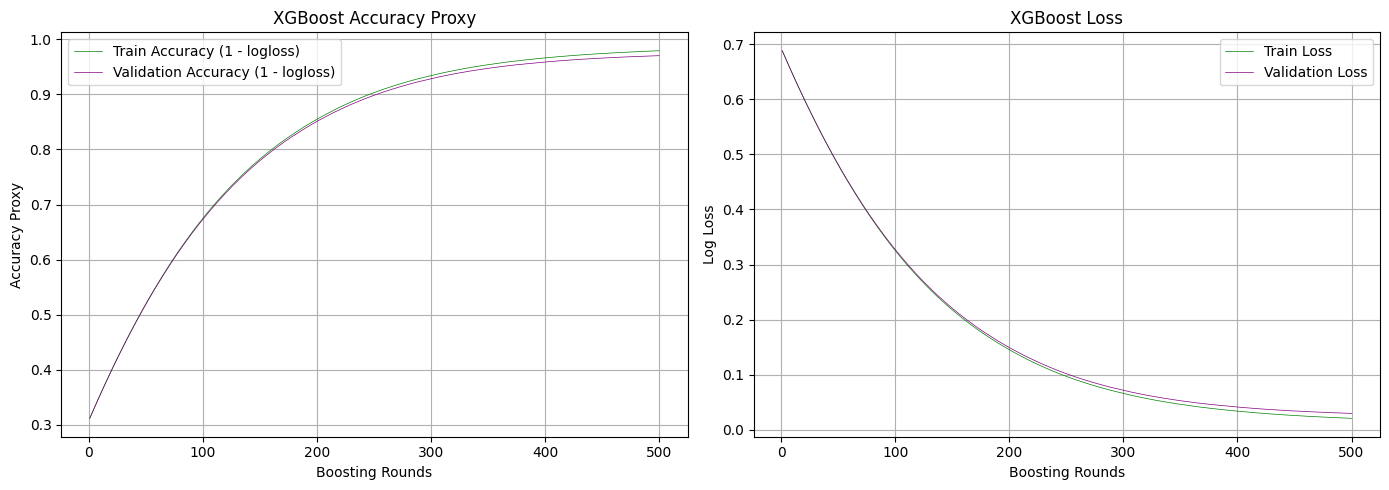

In [ ]:
plot_xgboost_metrics(evals_result)

In [ ]:
import matplotlib.pyplot as plt

def plot_xgboost_metrics(evals_result):
    train_loss = evals_result['train']['logloss']
    val_loss = evals_result['eval']['logloss']
    epochs = range(1, len(train_loss) + 1)

    # Proxy for accuracy
    train_acc = [1 - l for l in train_loss]
    val_acc = [1 - l for l in val_loss]

    plt.figure(figsize=(14, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_acc, color='green', linewidth=2, label='Train Accuracy (1 - logloss)')
    plt.title('XGBoost Accuracy Proxy')
    plt.xlabel('Boosting Rounds')
    plt.ylabel('Accuracy Proxy')
    plt.legend()
    plt.grid()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, color='green', linewidth=2, label='Train Loss')
    plt.title('XGBoost Loss')
    plt.xlabel('Boosting Rounds')
    plt.ylabel('Log Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


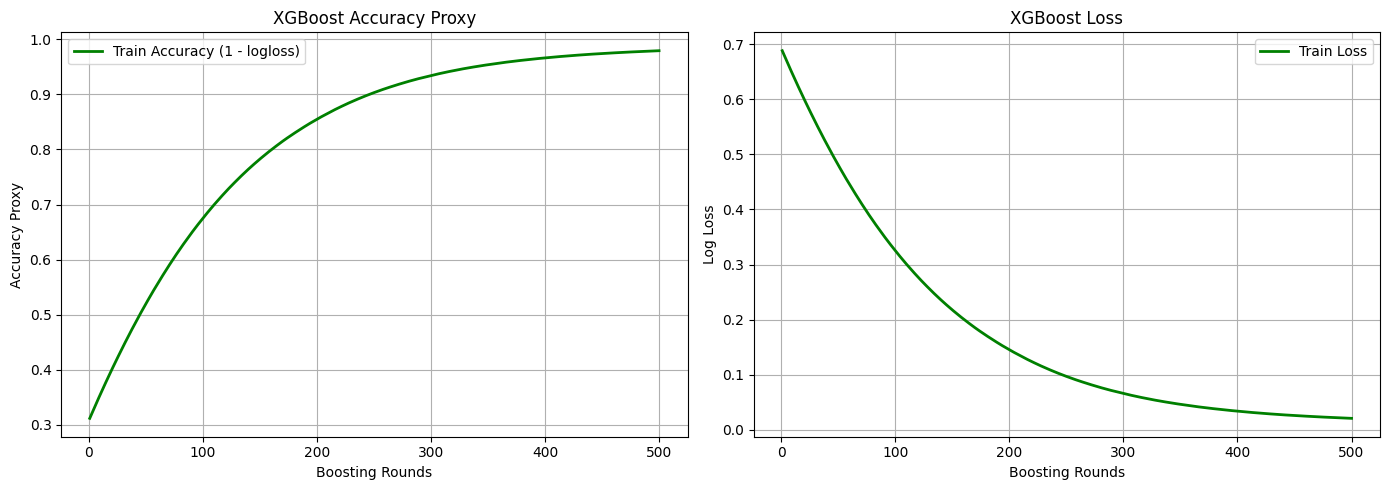

In [ ]:
plot_xgboost_metrics(evals_result)

In [ ]:
import matplotlib.pyplot as plt

def plot_xgboost_metrics(evals_result):
    train_loss = evals_result['train']['logloss']
    val_loss = evals_result['eval']['logloss']
    epochs = range(1, len(train_loss) + 1)

    # Proxy for accuracy
    train_acc = [1 - l for l in train_loss]
    val_acc = [1 - l for l in val_loss]

    plt.figure(figsize=(14, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, val_acc, color='purple', linewidth=2, label='Validation Accuracy (1 - logloss)')
    plt.title('XGBoost Accuracy Proxy')
    plt.xlabel('Boosting Rounds')
    plt.ylabel('Accuracy Proxy')
    plt.legend()
    plt.grid()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_loss, color='purple', linewidth=2, label='Validation Loss')
    plt.title('XGBoost Loss')
    plt.xlabel('Boosting Rounds')
    plt.ylabel('Log Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


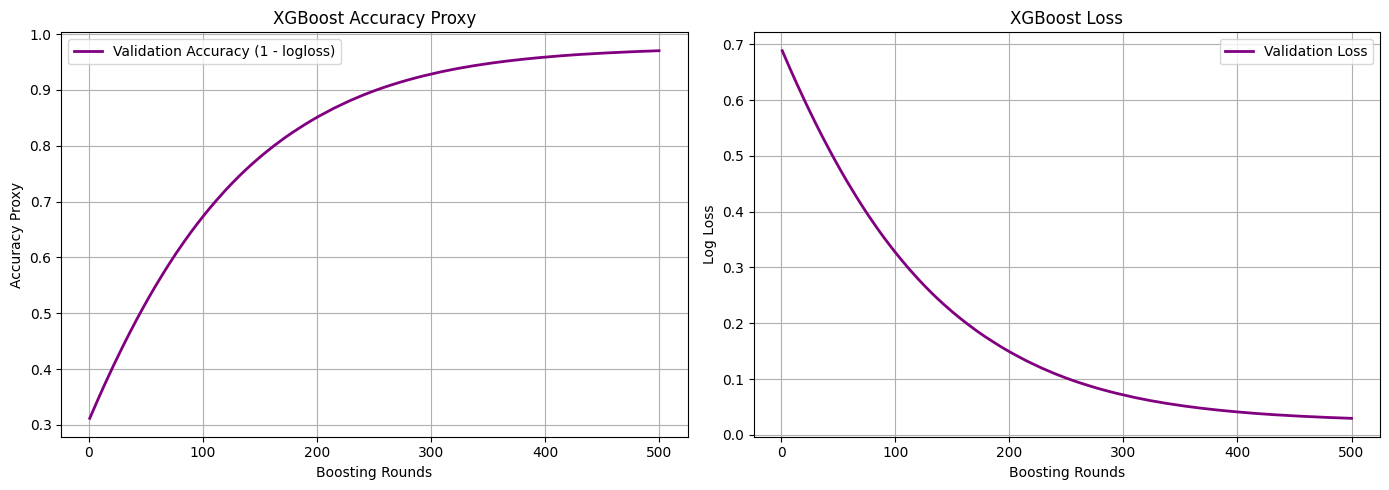

In [ ]:
plot_xgboost_metrics(evals_result)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Reshape for LSTM: (samples, timesteps, features) — use timesteps = 1
X_train_bilstm = np.expand_dims(X_train_res.values, axis=1)
X_test_bilstm = np.expand_dims(X_test.values, axis=1)


In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from tensorflow.keras.callbacks import EarlyStopping

def objective_bilstm(params):
    model = models.Sequential()
    model.add(layers.Input(shape=(1, X_train.shape[1])))
    model.add(layers.Bidirectional(layers.LSTM(int(params['units1']), return_sequences=True)))
    model.add(layers.Dropout(params['dropout']))
    model.add(layers.Bidirectional(layers.LSTM(int(params['units2']))))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    es = EarlyStopping(patience=3, restore_best_weights=True, monitor='val_loss')

    history = model.fit(
        X_train_bilstm, y_train_res,
        validation_split=0.2,
        epochs=30,
        batch_size=32,
        verbose=0,
        callbacks=[es]
    )

    val_loss = np.min(history.history['val_loss'])
    return {'loss': val_loss, 'status': STATUS_OK}

space_bilstm = {
    'units1': hp.quniform('units1', 32, 128, 16),
    'units2': hp.quniform('units2', 16, 64, 8),
    'dropout': hp.uniform('dropout', 0.1, 0.5)
}

trials_bilstm = Trials()
best_bilstm = fmin(fn=objective_bilstm, space=space_bilstm, algo=tpe.suggest, max_evals=20, trials=trials_bilstm)

print("Best BiLSTM Parameters:")
print(best_bilstm)


100%|██████████| 20/20 [48:05<00:00, 144.26s/trial, best loss: 0.043788641691207886]
Best BiLSTM Parameters:
{'dropout': np.float64(0.2379658824930122), 'units1': np.float64(128.0), 'units2': np.float64(40.0)}


In [ ]:
def build_bilstm_model(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Bidirectional(layers.LSTM(32))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    residual = layers.Flatten()(inputs)
    x = layers.concatenate([x, residual])  # Residual connection
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

bilstm_model = build_bilstm_model((1, X_train.shape[1]))

history = bilstm_model.fit(
    X_train_bilstm, y_train_res,
    epochs=30, batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Predict on test set
bilstm_probs = bilstm_model.predict(X_test_bilstm).flatten()
bilstm_preds = (bilstm_probs > 0.5).astype(int)


Epoch 1/30
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9599 - loss: 0.1296 - val_accuracy: 0.9719 - val_loss: 0.0727
Epoch 2/30
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9805 - loss: 0.0734 - val_accuracy: 0.9701 - val_loss: 0.1061
Epoch 3/30
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9797 - loss: 0.0713 - val_accuracy: 0.9727 - val_loss: 0.0582
Epoch 4/30
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9811 - loss: 0.0656 - val_accuracy: 0.9717 - val_loss: 0.0710
Epoch 5/30
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9820 - loss: 0.0612 - val_accuracy: 0.9764 - val_loss: 0.0537
Epoch 6/30
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9818 - loss: 0.0626 - val_accuracy: 0.9868 - val_loss: 0.0488
Epoch 7/30
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9819 - loss: 0.0597 - val_accuracy: 0.9752 - val_loss: 0.0487
Epoch 8/30
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9824 - loss: 0.0

In [ ]:
combined_probs = (xgb_probs + bilstm_probs) / 2
combined_preds = (combined_probs > 0.5).astype(int)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, f1_score, recall_score
import matplotlib.pyplot as plt

print("Classification Report:")
print(classification_report(y_test, combined_preds))

print("AUC-ROC Score:", roc_auc_score(y_test, combined_probs))

# Accuracy, F1, Recall
acc = accuracy_score(y_test, combined_preds)
f1 = f1_score(y_test, combined_preds)
recall = recall_score(y_test, combined_preds)
auc = roc_auc_score(y_test, combined_probs)

print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC-ROC: {auc:.4f}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.95      0.78       121
         1.0       1.00      0.99      0.99      5586

    accuracy                           0.99      5707
   macro avg       0.83      0.97      0.89      5707
weighted avg       0.99      0.99      0.99      5707

AUC-ROC Score: 0.990776823996236
Accuracy: 0.9890
F1 Score: 0.9943
Recall: 0.9898
AUC-ROC: 0.9908


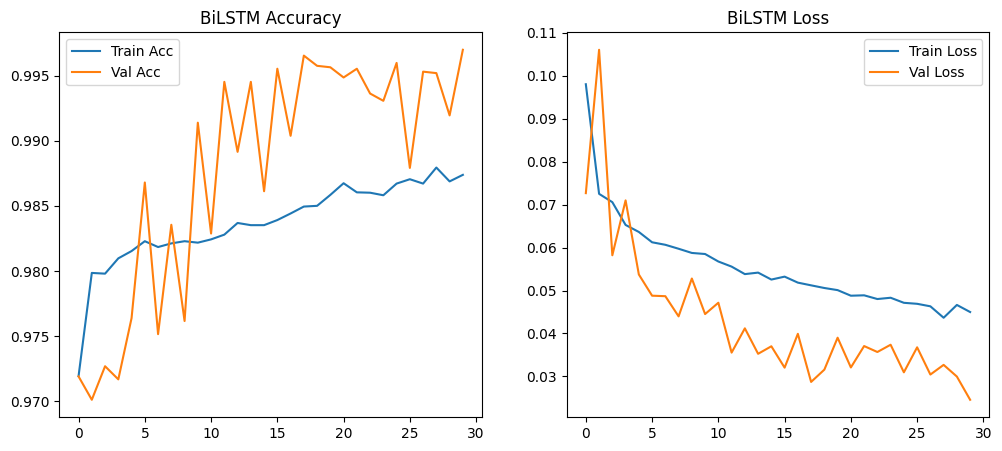

In [ ]:
# Validation loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('BiLSTM Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('BiLSTM Loss')
plt.legend()
plt.show()